In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get data

In [17]:
# read data from csv file
fake_transaction = pd.read_csv('fake_transactional_data_24.csv')

# EDA

In [18]:
# sort value from date to see starting and ending date in data
fake_transaction.sort_values('not_happened_yet_date')

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
13385,98994.0,2.65,COFFEE_SHOP,01/01/2025
13384,98994.0,2.20,A_LOCAL_COFFEE_SHOP,01/01/2025
13383,34189.0,14.50,BAR,01/01/2025
13382,86417.0,4.35,COFFEE_SHOP,01/01/2025
...,...,...,...,...
10137340,60186.0,2.65,35802,31/12/2025
10137341,48432.0,2.45,COFFEE_SHOP,31/12/2025
10137342,35802.0,5.30,COFFEE_SHOP,31/12/2025
10137248,42065.0,6.00,83201,31/12/2025


In [19]:
# check data types
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


the not_happened_yet_date column is not datetime type but it is object

In [20]:
# convert 'not_happened_yet_date' column (object type) to datetime type
fake_transaction['not_happened_yet_date'] = pd.to_datetime(fake_transaction['not_happened_yet_date'], format='%d/%m/%Y')
fake_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      float64       
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 309.7+ MB


 ## find average money spend by month from each account

In [21]:
# extract month from the 'not_happened_yet_date' column
fake_transaction['transaction_month'] = fake_transaction['not_happened_yet_date'].dt.month
fake_transaction['transaction_year'] = fake_transaction['not_happened_yet_date'].dt.year

# group by month and calculate the average transaction amount
average_amount_by_month = fake_transaction.groupby(['from_totally_fake_account', 'transaction_month'])['monopoly_money_amount'].mean()

print(average_amount_by_month)

from_totally_fake_account  transaction_month
1000.0                     1                    17.769103
                           2                    18.838758
                           3                    14.192364
                           4                    14.217955
                           5                    16.312301
                                                  ...    
100988.0                   8                    14.415319
                           9                    15.914783
                           10                   15.452752
                           11                   15.529531
                           12                   15.391210
Name: monopoly_money_amount, Length: 97704, dtype: float64


 ## Scatter plot of sample dataset in order to see the money trend from particular account

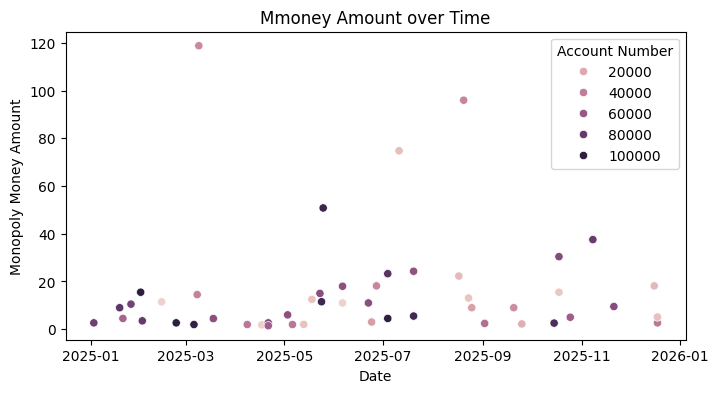

In [22]:
# sample a subset of the data for plotting
sample_data = fake_transaction.sample(n=50, random_state = 10)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sample_data)
plt.title('Mmoney Amount over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account Number')
plt.show()

Some account such as Account Number 40000 has abnormal spending in 2025-01 and also 2025-03, it migh be fraund or ,marketing campaign in that month

 ## Line Plot (same as above)

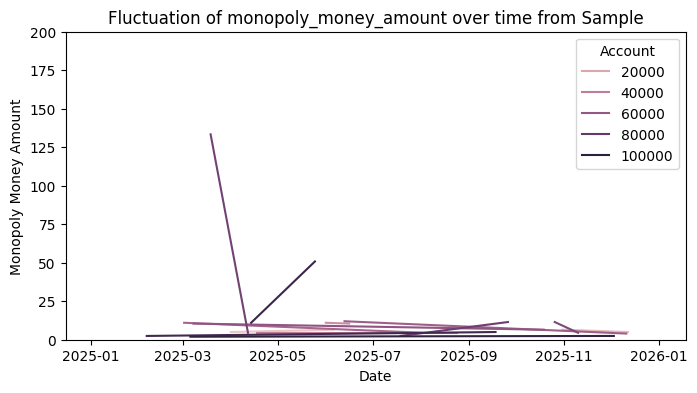

In [23]:
# sample a subset of data for plotting line graph
sampled_data = fake_transaction.sample(n=500, random_state = 10)

plt.figure(figsize=(8, 4))
sns.lineplot(x='not_happened_yet_date', y='monopoly_money_amount', hue='from_totally_fake_account', data=sampled_data, markers=True)
plt.title('Fluctuation of monopoly_money_amount over time from Sample')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.legend(title='Account')
plt.ylim(0,200)
plt.show()

very unclear, but various line are flat, which mean the trend of spending money has no change in each account.


## plot weekly avg. with monthly avg.

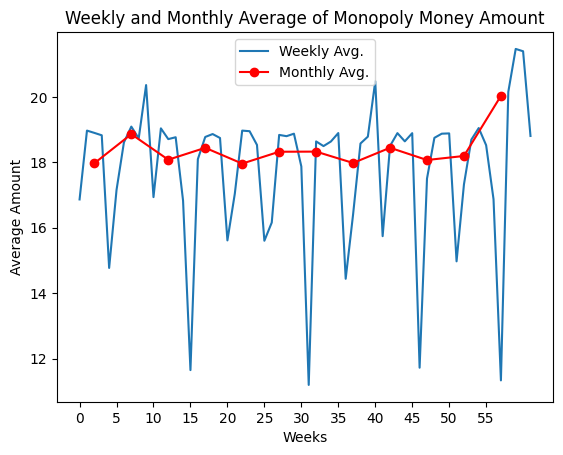

In [24]:
fake_transaction['transaction_week'] = fake_transaction['not_happened_yet_date'].dt.isocalendar().week

# calculate weekly and monthly averages
weekly_avg = fake_transaction.groupby(['transaction_year', 'transaction_month', 'transaction_week'])['monopoly_money_amount'].mean().reset_index() # consider if we have various year 
monthly_avg = fake_transaction.groupby(['transaction_year', 'transaction_month'])['monopoly_money_amount'].mean().reset_index()

fig, ax = plt.subplots()
ax.plot(weekly_avg.index, weekly_avg['monopoly_money_amount'], label='Weekly Avg.')
# assume 1 month has 5 weeks and avg first month at week 2
ax.plot(2 + monthly_avg.index * 5, monthly_avg['monopoly_money_amount'], marker='o', linestyle='-', color='r', label='Monthly Avg.')

# set x-axis label to represent months multiplied by 5
month_labels = [label * 5 for label in range(len(monthly_avg['transaction_month']))]
ax.set_xticks(month_labels)

ax.set_xlabel('Weeks')
ax.set_ylabel('Average Amount')
ax.set_title('Weekly and Monthly Average of Monopoly Money Amount')
ax.legend()

plt.show()


In [25]:
weekly_avg.tail(10) # it might because the 1st week of January is being counted as part of December (weakness of isocalendar())

,transaction_year,transaction_month,transaction_week,monopoly_money_amount
52,2025,11,44,17.324033
53,2025,11,45,18.692746
54,2025,11,46,19.047502
55,2025,11,47,18.522565
56,2025,11,48,16.870010
57,2025,12,1,11.330995
58,2025,12,49,20.155405
59,2025,12,50,21.466803
60,2025,12,51,21.395351
61,2025,12,52,18.805227


People tend to spend high in each transection in december

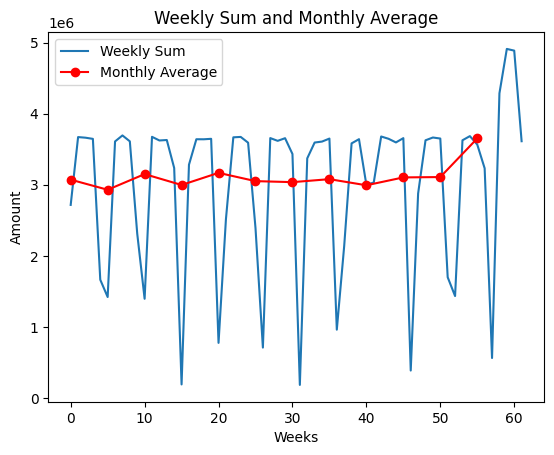

In [26]:
# calculate weekly sums
weekly_sum = fake_transaction.groupby(['transaction_year', 'transaction_month', 'transaction_week'])['monopoly_money_amount'].sum().reset_index()

# combine weekly sums to monthly level
monthly_avg = weekly_sum.groupby(['transaction_year', 'transaction_month']).agg({'monopoly_money_amount': 'sum'}).reset_index()
monthly_avg['monopoly_money_amount'] /= 5  # assume 1 month has 5 weeks

fig, ax = plt.subplots()
ax.plot(weekly_sum.index, weekly_sum['monopoly_money_amount'], label='Weekly Sum')

ax.plot([5 * i for i in range(len(monthly_avg))], monthly_avg['monopoly_money_amount'], marker='o', linestyle='-', color='r', label='Monthly Average')

ax.set_xlabel('Weeks')
ax.set_ylabel('Amount')
ax.set_title('Weekly Sum and Monthly Average')
ax.legend()

plt.show()


In [27]:
data_time = fake_transaction.set_index('not_happened_yet_date', inplace=False)
data_time

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,transaction_month,transaction_year,transaction_week
not_happened_yet_date,,,,,,
2025-01-01,10371.0,4.00,CINEMA,1,2025,1
2025-01-01,88339.0,2.40,40544,1,2025,1
2025-01-01,18555.0,2.40,85149,1,2025,1
2025-01-01,18555.0,4.10,HIPSTER_COFFEE_SHOP,1,2025,1
2025-01-01,80792.0,1.95,18555,1,2025,1
...,...,...,...,...,...,...
2025-12-31,32185.0,2.65,COFFEE_SHOP,12,2025,1
2025-12-31,32185.0,2.45,COFFEE_SHOP,12,2025,1
2025-12-31,57569.0,14.00,WINE_BAR,12,2025,1


Before normalize
                       monthly_sum  days
not_happened_yet_date                   
2025-01-31             15356512.85    31
2025-02-28             14645381.97    28
2025-03-31             15746678.39    31
2025-04-30             14981481.00    30
2025-05-31             15835541.72    31
2025-06-30             15252728.86    30
2025-07-31             15181448.00    31
2025-08-31             15391387.82    31
2025-09-30             14961001.77    30
2025-10-31             15514159.54    31
2025-11-30             15538928.68    30
2025-12-31             18256984.89    31
After normalize
                       monthly_sum  days
not_happened_yet_date                   
2025-01-31             14861141.47    30
2025-02-28             15691480.68    30
2025-03-31             15238721.02    30
2025-04-30             14981481.00    30
2025-05-31             15324717.79    30
2025-06-30             15252728.86    30
2025-07-31             14691723.87    30
2025-08-31             1

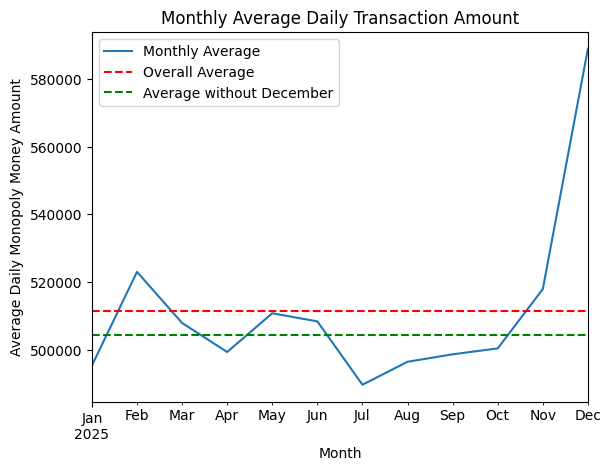

In [28]:
monthly_sum = data_time['monopoly_money_amount'].resample('M').sum()
monthly_days = data_time.index.to_series().resample('M').nunique()
monthly_days.loc['2025-08-31'] += 1
new = pd.DataFrame({'monthly_sum': monthly_sum, 'days': monthly_days})
print("Before normalize")
print(new)

# normalize data to let all months have 30 days in total
new['monthly_sum'] = new['monthly_sum'] * 30 / new['days']

if (new['days'] != 30).any():
    new['days'] = 30
else:
    pass

print("After normalize")
pd.set_option('display.float_format', '{:.2f}'.format)
print(new)

# finding monthly average in each month
monthly_average = new['monthly_sum'] / new['days']

# find overall average from monthly average
overall_average = monthly_average.mean()

# find the overall average without December
monthly_average_without_december = monthly_average[monthly_average.index.month != 12]
overall_average_without_december = monthly_average_without_december.mean()

monthly_average.plot()
plt.axhline(y=overall_average, color='r', linestyle='--')
plt.axhline(y=overall_average_without_december, color='g', linestyle='--')

plt.title('Monthly Average Daily Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Average Daily Monopoly Money Amount')
plt.legend(['Monthly Average', 'Overall Average', 'Average without December'])
plt.show()


##  monthly total amounth in one place 

In [29]:
# calculate the monthly total amounth of monopoly_money_amount for each to_randomly_generated_account
monthly_sum = fake_transaction.groupby(['to_randomly_generated_account', 'transaction_month'])['monopoly_money_amount'].sum().reset_index()

print(monthly_sum)


       to_randomly_generated_account  transaction_month  monopoly_money_amount
0                               1000                  1                 727.95
1                               1000                  2                 775.45
2                               1000                  3                 749.00
3                               1000                  4                 760.75
4                               1000                  5                 745.65
...                              ...                ...                    ...
170635                   WINE_CELLAR                  8                8590.82
170636                   WINE_CELLAR                  9                9602.72
170637                   WINE_CELLAR                 10                9572.62
170638                   WINE_CELLAR                 11                9717.53
170639                   WINE_CELLAR                 12              126309.76

[170640 rows x 3 columns]


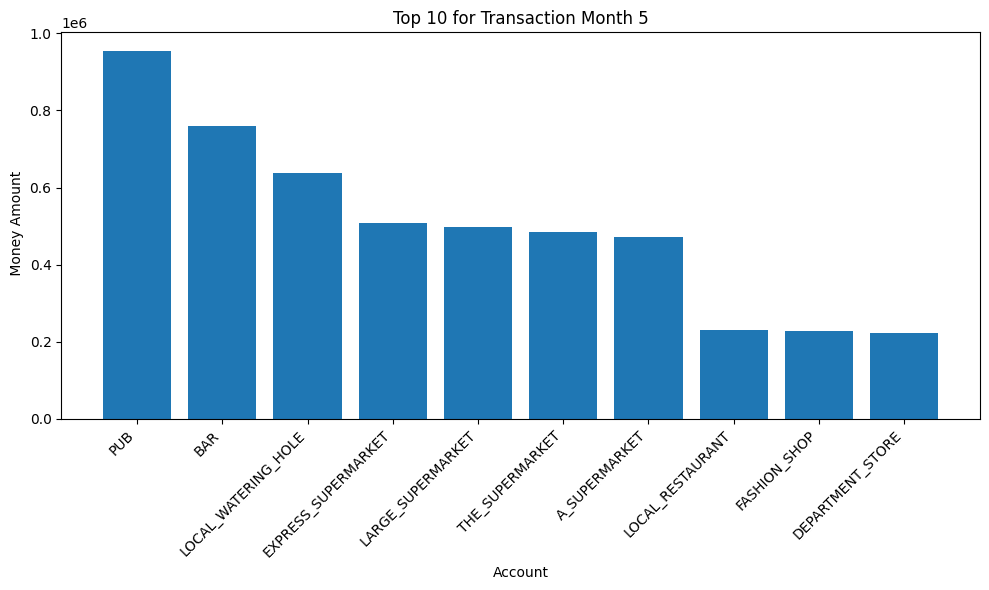

In [30]:
def plot_test(month):
    
    # filter the dataset for transaction_month 1
    month_1 = monthly_sum[monthly_sum['transaction_month'] == month]

    # sort the values by monopoly_money_amount (descending order)
    sorted_month_1 = month_1.sort_values(by='monopoly_money_amount', ascending=False)

    # top 10 of to_randomly_generated_account
    top_10 = sorted_month_1.head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_10['to_randomly_generated_account'], top_10['monopoly_money_amount'])
    plt.xlabel('Account')
    plt.ylabel(' Money Amount')
    plt.title(f'Top 10 for Transaction Month {month}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
    
plot_test(5)

## find weekend and weekday to show people spending most 

In [31]:
# extract day of the week (0 = Monday, 6 = Sunday)
fake_transaction['day_of_week'] = fake_transaction['not_happened_yet_date'].dt.dayofweek

# create function to categorize weekdays and weekends
def categorize_day(day):
    if day < 5:  # fot monday to friday
        return 'weekday'
    else: # others
        return 'weekend'

# use this function to create new column
fake_transaction['week_or_day'] = fake_transaction['day_of_week'].apply(categorize_day)

fake_transaction

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,transaction_year,transaction_week,day_of_week,week_or_day
0,10371.00,4.00,CINEMA,2025-01-01,1,2025,1,2,weekday
1,88339.00,2.40,40544,2025-01-01,1,2025,1,2,weekday
2,18555.00,2.40,85149,2025-01-01,1,2025,1,2,weekday
3,18555.00,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2025,1,2,weekday
4,80792.00,1.95,18555,2025-01-01,1,2025,1,2,weekday
...,...,...,...,...,...,...,...,...,...
10148275,32185.00,2.65,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday
10148276,32185.00,2.45,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday
10148277,57569.00,14.00,WINE_BAR,2025-12-31,12,2025,1,2,weekday
10148278,1490.00,9.00,57569,2025-12-31,12,2025,1,2,weekday


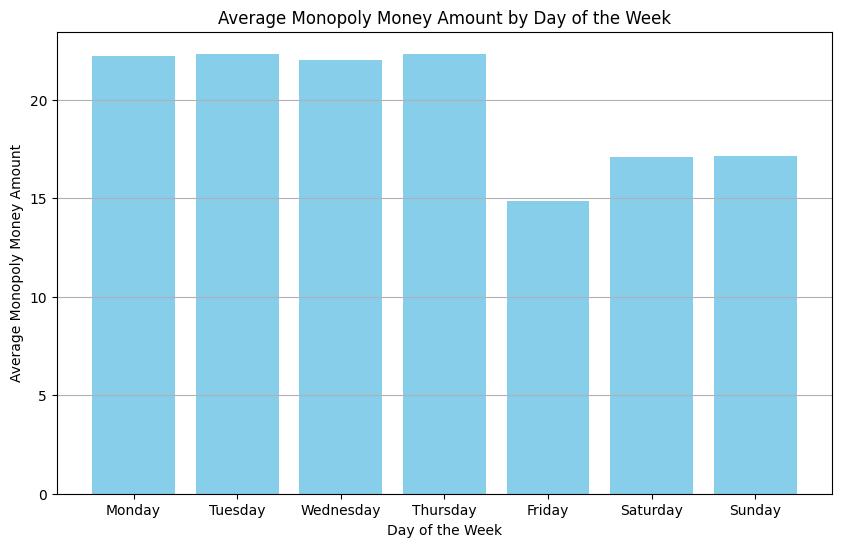

In [43]:
# average Monopoly Money Amount for each day of the week
daily_avg = fake_transaction.groupby('day_of_week')['monopoly_money_amount'].mean()

# day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure()
plt.bar(day_labels, daily_avg, color='skyblue')
plt.title('Average Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Monopoly Money Amount')
plt.grid(axis='y')
plt.show()


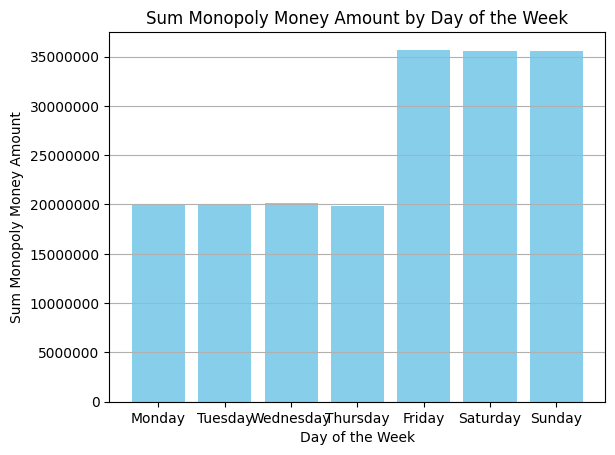

In [71]:
# average Monopoly Money Amount for each day of the week
daily_avg = fake_transaction.groupby('day_of_week')['monopoly_money_amount'].sum()

# day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure()
plt.bar(day_labels, daily_avg, color='skyblue')
plt.title('Sum Monopoly Money Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sum Monopoly Money Amount')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


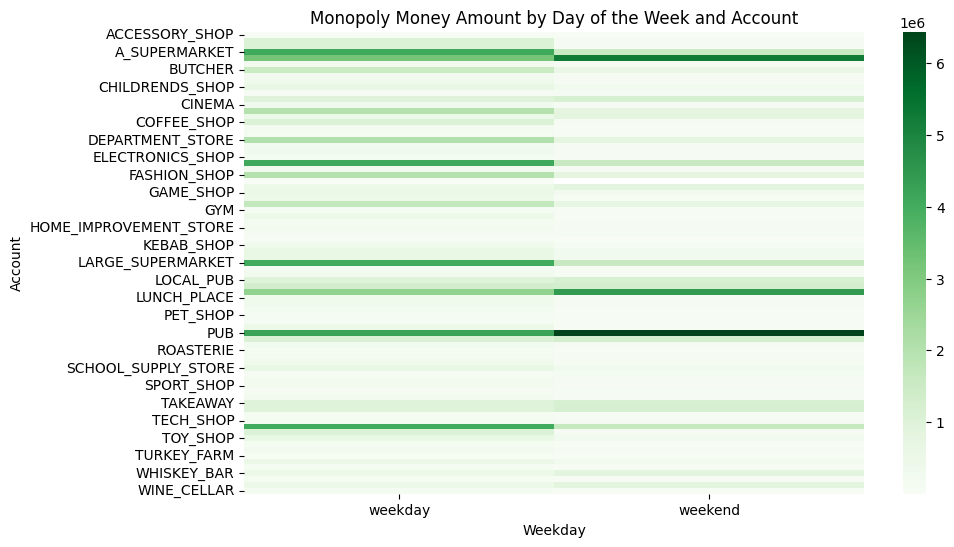

In [74]:
# remove numerical values from 'to_randomly_generated_account'
fake_transaction['to_randomly_generated_account'] = fake_transaction['to_randomly_generated_account'].apply(lambda x: x if not x.isdigit() else 'Other')
new_fake_transaction = fake_transaction[fake_transaction['to_randomly_generated_account'] != 'Other']

# pivot the data
heatmap_data = new_fake_transaction.pivot_table(index='to_randomly_generated_account', columns='week_or_day', values='monopoly_money_amount', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, cmap='Greens')
plt.title('Monopoly Money Amount by Day of the Week and Account')
plt.xlabel('Weekday')
plt.ylabel('Account')
plt.show()



 ## z-score for extream data detection (detect extreme data by examining the tails)

In [ ]:
# calculate mean and standard deviation
mean_amount = fake_transaction['monopoly_money_amount'].mean()
std_amount = fake_transaction['monopoly_money_amount'].std()

# calculate z-scores
fake_transaction['z_score'] = (fake_transaction['monopoly_money_amount'] - mean_amount) / std_amount

# set threshold for anomaly detection
threshold = std_amount

# detect anomalies based on the threshold
extreme = fake_transaction[abs(fake_transaction['z_score']) > threshold]

print(extreme)




Empty DataFrame
Columns: [from_totally_fake_account, monopoly_money_amount, to_randomly_generated_account, not_happened_yet_date, transaction_month, transaction_year, transaction_week, day_of_week, week_or_day, z_score]
Index: []


Cannot detect by using distribution

## Import new table called 'holidays'

In [ ]:
holidays = pd.read_csv('holidays.csv')
holidays

,date,holiday
0,2012-01-02,New Year's Day
1,2012-02-20,Family Day
2,2012-04-06,Good Friday
3,2012-05-21,Victoria Day
4,2012-07-02,Canada Day
...,...,...
193,2025-12-25,Christmas Day
194,2025-12-26,Boxing Day
195,2025-12-29,Additional Day
196,2025-12-30,Additional Day


In [ ]:
# check type
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     198 non-null    object
 1   holiday  198 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
# convert date columnfrom object type into datetime64
holidays['date'] = pd.to_datetime(holidays['date'], format='%Y-%m-%d')
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     198 non-null    datetime64[ns]
 1   holiday  198 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 3.2+ KB


In [ ]:
# check year in our data to collect particular year from holidays dataframe
fake_transaction['not_happened_yet_date'].dt.year.unique()

array([2025], dtype=int32)

There is only 2025, so I will filter only 2025 from holidays table

In [ ]:
holidays['year'] = holidays['date'].dt.year
holidays = holidays[holidays['year'] == 2025]
holidays

,date,holiday,year
183,2025-01-01,New Year's Day,2025
184,2025-02-17,Family Day,2025
185,2025-04-18,Good Friday,2025
186,2025-05-19,Victoria Day,2025
187,2025-06-30,Additional Day,2025
188,2025-07-01,Canada Day,2025
189,2025-08-04,Civic Holiday,2025
190,2025-09-01,Labour Day,2025
191,2025-10-13,Thanksgiving,2025
192,2025-12-24,Additional Day,2025


In [ ]:
# remove irrelavant row (Canada Day, Victoria Day)
holidays = holidays[holidays['holiday'] != "Canada Day"]
holidays = holidays[holidays['holiday'] != "Victoria Day"]
holidays

,date,holiday,year
183,2025-01-01,New Year's Day,2025
184,2025-02-17,Family Day,2025
185,2025-04-18,Good Friday,2025
187,2025-06-30,Additional Day,2025
189,2025-08-04,Civic Holiday,2025
190,2025-09-01,Labour Day,2025
191,2025-10-13,Thanksgiving,2025
192,2025-12-24,Additional Day,2025
193,2025-12-25,Christmas Day,2025
194,2025-12-26,Boxing Day,2025


## Merge fake_transaction and holidays table by using leftjoin for futher EDA

In [ ]:
# merge two table by using leftjoin
merged_df = pd.merge(fake_transaction, holidays, how='left', left_on='not_happened_yet_date', right_on='date')

# replace null values in the holiday column with "Normal Day"
merged_df['holiday'] = merged_df['holiday'].fillna("Normal Day")
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_month,transaction_year,transaction_week,day_of_week,week_or_day,z_score,date,holiday,year
0,10371.0,4.00,CINEMA,2025-01-01,1,2025,1,2,weekday,-0.167127,2025-01-01,New Year's Day,2025.0
1,88339.0,2.40,40544,2025-01-01,1,2025,1,2,weekday,-0.185705,2025-01-01,New Year's Day,2025.0
2,18555.0,2.40,85149,2025-01-01,1,2025,1,2,weekday,-0.185705,2025-01-01,New Year's Day,2025.0
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2025,1,2,weekday,-0.165965,2025-01-01,New Year's Day,2025.0
4,80792.0,1.95,18555,2025-01-01,1,2025,1,2,weekday,-0.190930,2025-01-01,New Year's Day,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday,-0.182802,2025-12-31,Additional Day,2025.0
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,12,2025,1,2,weekday,-0.185124,2025-12-31,Additional Day,2025.0
10148277,57569.0,14.00,WINE_BAR,2025-12-31,12,2025,1,2,weekday,-0.051014,2025-12-31,Additional Day,2025.0
10148278,1490.0,9.00,57569,2025-12-31,12,2025,1,2,weekday,-0.109070,2025-12-31,Additional Day,2025.0


In [ ]:
# drop irrelavant columns
merged_df = merged_df.drop(columns=['date', 'year','transaction_month', 'z_score'])
merged_df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_year,transaction_week,day_of_week,week_or_day,holiday
0,10371.0,4.00,CINEMA,2025-01-01,2025,1,2,weekday,New Year's Day
1,88339.0,2.40,40544,2025-01-01,2025,1,2,weekday,New Year's Day
2,18555.0,2.40,85149,2025-01-01,2025,1,2,weekday,New Year's Day
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,2025,1,2,weekday,New Year's Day
4,80792.0,1.95,18555,2025-01-01,2025,1,2,weekday,New Year's Day
...,...,...,...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Additional Day
10148276,32185.0,2.45,COFFEE_SHOP,2025-12-31,2025,1,2,weekday,Additional Day
10148277,57569.0,14.00,WINE_BAR,2025-12-31,2025,1,2,weekday,Additional Day
10148278,1490.0,9.00,57569,2025-12-31,2025,1,2,weekday,Additional Day


In [ ]:
pivot_table = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='sum')
pivot_table.sort_values(by='monopoly_money_amount', ascending=False)

,monopoly_money_amount
to_randomly_generated_account,
PUB,10639504.55
BAR,8458081.50
LOCAL_WATERING_HOLE,7116813.00
EXPRESS_SUPERMARKET,5704381.30
THE_SUPERMARKET,5663475.74
...,...
41392,11.50
1243,10.00
18311,9.65


## explore money spend on each account in each holiday


In [ ]:
# explore money spend on each account in each holiday
pivot_table = merged_df.pivot_table(index='to_randomly_generated_account', columns='holiday', values='monopoly_money_amount', aggfunc='sum')
pivot_table.sort_values(by='to_randomly_generated_account', ascending = False).head(10)

holiday,Additional Day,Boxing Day,Christmas Day,Civic Holiday,Family Day,Good Friday,Labour Day,New Year's Day,Normal Day,Thanksgiving
to_randomly_generated_account,,,,,,,,,,
WINE_CELLAR,503.85,249.95,243.92,486.86,631.85,398.92,320.91,223.95,229276.10,203.94
WINE_BAR,2467.00,8727.50,382.00,457.00,435.00,8047.50,374.50,396.00,1331345.50,559.50
WHISKEY_SHOP,507.89,228.94,337.93,666.82,324.90,360.91,286.95,259.93,231447.22,183.94
WHISKEY_BAR,2383.50,7496.00,502.00,392.00,380.00,8103.50,498.50,407.50,1343114.00,458.00
WE_HAVE_BEAN_WEIGHTING,655.48,361.38,373.18,369.56,336.36,465.00,96.36,181.83,234251.81,307.73
VIDEO_GAME_STORE,7396.00,1787.00,1848.00,2169.00,2263.00,2249.00,1881.00,1716.00,747262.00,1841.00
TURKEY_FARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98280.00,NaN
TRAINER_SHOP,3184.00,885.00,797.00,868.00,524.00,654.00,519.00,995.00,284137.00,920.00
TO_BEAN_OR_NOT_TO_BEAN,597.29,359.55,211.83,425.44,520.01,513.64,259.55,64.09,233072.13,400.46


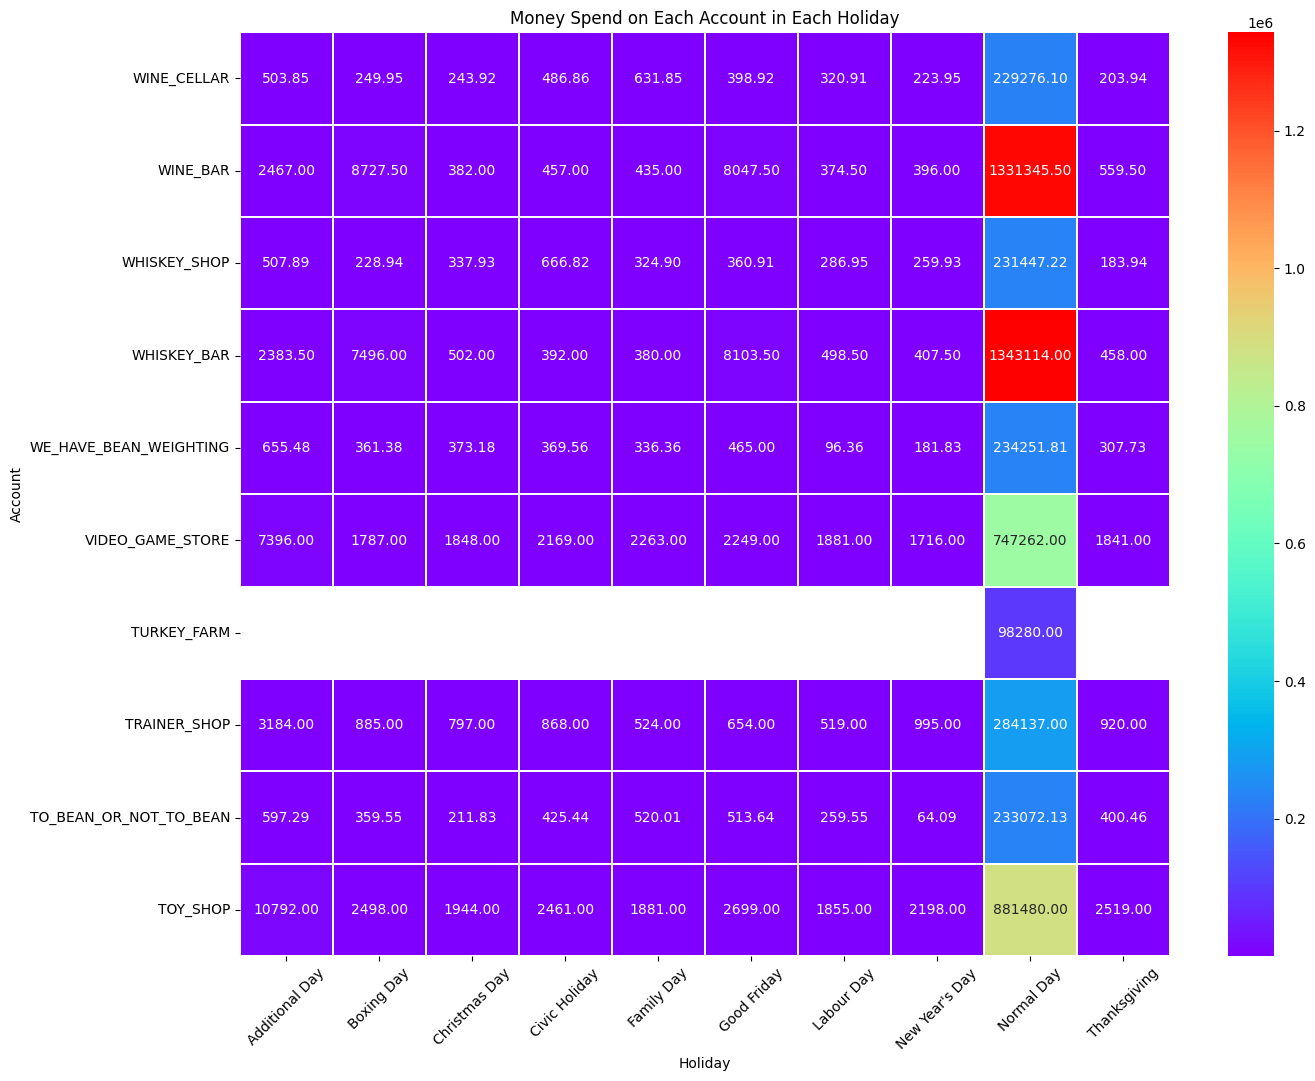

In [ ]:
topten = pivot_table.sort_values(by='to_randomly_generated_account', ascending = False).head(10)
plt.figure(figsize=(15, 12))
sns.heatmap(topten, cmap='rainbow', annot=True, fmt=".2f", linewidths=.2)
plt.title('Money Spend on Each Account in Each Holiday')
plt.xlabel('Holiday')
plt.ylabel('Account')
plt.xticks(rotation=45)
plt.show()


## find account that make the most on each holiday

In [ ]:
# find account that make the most on each holiday
max_account_per_holiday = pivot_table.idxmax(axis=0)
max_account_per_holiday

holiday
Additional Day    EXPRESS_SUPERMARKET
Boxing Day                        PUB
Christmas Day     EXPRESS_SUPERMARKET
Civic Holiday           A_SUPERMARKET
Family Day            THE_SUPERMARKET
Good Friday                       PUB
Labour Day          STREAMING_SERVICE
New Year's Day      STREAMING_SERVICE
Normal Day                        PUB
Thanksgiving          THE_SUPERMARKET
dtype: object

## find maximum monopoly_money_amount in each account

In [ ]:
# extract month from 'not_happened_yet_date'
merged_df['transaction_month'] = merged_df['not_happened_yet_date'].dt.month

# calculate monthly average for 'monopoly_money_amount'
monthly_average_oneplace = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='mean')

print(monthly_average_oneplace.sort_values(by='monopoly_money_amount', ascending=False))


                               monopoly_money_amount
to_randomly_generated_account                       
25652                                    1418.990148
58898                                    1351.347973
27940                                    1285.848101
7455                                     1257.438272
87073                                    1252.722081
...                                              ...
A_LOCAL_COFFEE_SHOP                         2.408332
COFFEE_SHOP                                 2.407160
TOTALLY_A_REAL_COFFEE_SHOP                  2.406978
47342                                       2.275000
53860                                       2.066667

[14300 rows x 1 columns]


### most of account that are top is not show category so i assume it is spended on private account 

I want to drop all private and see only commercial 

In [ ]:
# reset  index to convert 'to_randomly_generated_account' to a real column
monthly_average_oneplace.reset_index(inplace=True)

# filter rows where contain only alphabet
monthly_average_oneplace = monthly_average_oneplace[monthly_average_oneplace['to_randomly_generated_account'].str.contains('[a-zA-Z]', regex=True)]
monthly_average_oneplace = monthly_average_oneplace.sort_values(by='monopoly_money_amount', ascending=False)
toptwenty = monthly_average_oneplace.head(20)
print(toptwenty)


      to_randomly_generated_account  monopoly_money_amount
14287                     TECH_SHOP             167.040790
14253      HIPSTER_ELECTRONICS_SHOP             164.971945
14242              ELECTRONICS_SHOP             162.500972
14239              DEPARTMENT_STORE             115.560800
14245                  FASHION_SHOP             114.587524
14234                  CLOTHES_SHOP             114.417344
14244   FASHIONABLE_SPORTSWARE_SHOP              75.713987
14292                  TRAINER_SHOP              75.002044
14281                    SPORT_SHOP              74.925181
14276                  RUNNING_SHOP              74.254018
14224                 A_SUPERMARKET              69.499952
14288               THE_SUPERMARKET              69.396835
14243           EXPRESS_SUPERMARKET              69.270802
14260             LARGE_SUPERMARKET              68.869210
14293                   TURKEY_FARM              59.027027
14290                      TOY_SHOP              55.4333

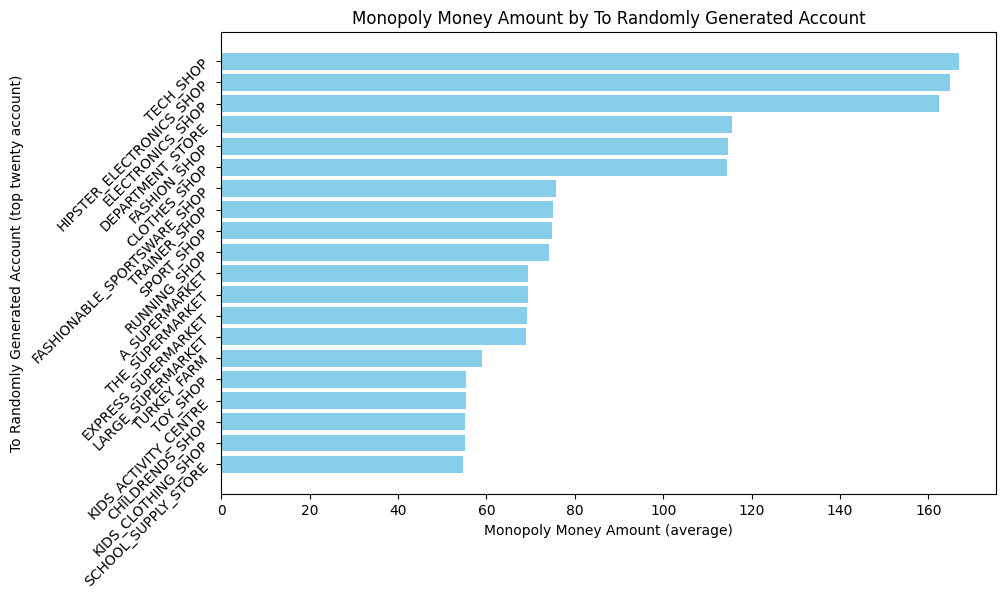

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(toptwenty['to_randomly_generated_account'], toptwenty['monopoly_money_amount'], color='skyblue')
plt.xlabel('Monopoly Money Amount (average)')
plt.ylabel('To Randomly Generated Account (top twenty account)')
plt.title('Monopoly Money Amount by To Randomly Generated Account')
plt.yticks(rotation=45, ha='right', fontsize=10)

plt.gca().invert_yaxis()  # invert y-axis to display the highest amount at the top
plt.show()


In [ ]:
# calculate monthly average for 'monopoly_money_amount'
monthly_sum_oneplace = merged_df.pivot_table(index='to_randomly_generated_account', values='monopoly_money_amount', aggfunc='sum')

print(monthly_sum_oneplace.sort_values(by='monopoly_money_amount', ascending=False))

# reset  index to convert 'to_randomly_generated_account' to a real column
monthly_sum_oneplace.reset_index(inplace=True)

# filter rows where contain only alphabet
monthly_sum_oneplace = monthly_sum_oneplace[monthly_sum_oneplace['to_randomly_generated_account'].str.contains('[a-zA-Z]', regex=True)]
monthly_sum_oneplace = monthly_sum_oneplace.sort_values(by='monopoly_money_amount', ascending=False)
toptwenty = monthly_sum_oneplace.head(20)
print(toptwenty)



                               monopoly_money_amount
to_randomly_generated_account                       
PUB                                      10639504.55
BAR                                       8458081.50
LOCAL_WATERING_HOLE                       7116813.00
EXPRESS_SUPERMARKET                       5704381.30
THE_SUPERMARKET                           5663475.74
...                                              ...
41392                                          11.50
1243                                           10.00
18311                                           9.65
53860                                           6.20
47342                                           4.55

[14300 rows x 1 columns]
      to_randomly_generated_account  monopoly_money_amount
14272                           PUB            10639504.55
14225                           BAR             8458081.50
14265           LOCAL_WATERING_HOLE             7116813.00
14243           EXPRESS_SUPERMARKET             5

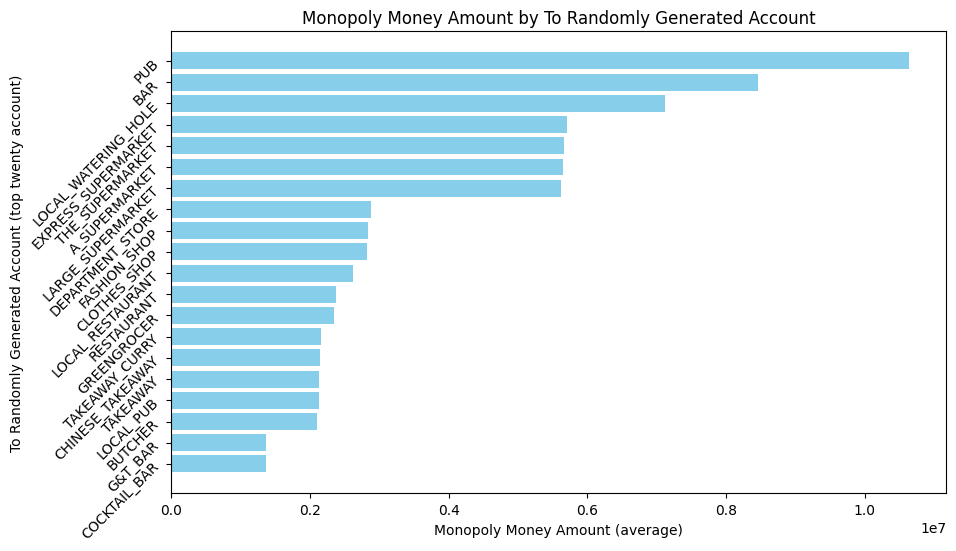

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(toptwenty['to_randomly_generated_account'], toptwenty['monopoly_money_amount'], color='skyblue')
plt.xlabel('Monopoly Money Amount (average)')
plt.ylabel('To Randomly Generated Account (top twenty account)')
plt.title('Monopoly Money Amount by To Randomly Generated Account')
plt.yticks(rotation=45, ha='right', fontsize=10)

plt.gca().invert_yaxis()  # invert y-axis to display the highest amount at the top
plt.show()


For Missing Value

https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/empirical-relation-between-mean-median-and-mode-1628764844.png


In [ ]:
# calculate median, mode, mean
median_amount = fake_transaction['monopoly_money_amount'].median()
mode_amount = fake_transaction['monopoly_money_amount'].mode().values[0]  # mode might return many values, so I will use the first value
mean_amount = fake_transaction['monopoly_money_amount'].mean()

print("Median:", median_amount)
print("Mode:", mode_amount)
print("Mean:", mean_amount)


Median: 6.0
Mode: 5.0
Mean: 18.393484954100593


Mode<Median<Mean

Positively Skewed -> so we will use the Median as the middle value instead mean

# DBSCANS